# Polynomial Regression model

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#creating the dataframe
df = pd.read_csv('processed_data.csv')
df = df[['market_value_in_million','goals', 'assists','minutes_played','yellow_cards','red_cards','position_Attack','position_Defender','position_Goalkeeper','position_Midfield','evaluation_age','club_total_market_value_in_million']]

In [3]:
df.sort_values(by='market_value_in_million').tail(20)
df

,market_value_in_million,goals,assists,minutes_played,yellow_cards,red_cards,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,evaluation_age,club_total_market_value_in_million
0,0.50,1,0,105,0,0,1,0,0,0,28.0,15.71
1,0.40,0,0,28,0,0,1,0,0,0,29.0,15.71
2,0.18,0,1,43,1,0,1,0,0,0,22.0,15.71
3,0.90,0,0,371,2,0,1,0,0,0,27.0,15.71
4,0.81,0,0,56,0,0,1,0,0,0,28.0,15.71
...,...,...,...,...,...,...,...,...,...,...,...,...
63970,4.05,0,1,630,3,0,0,0,0,1,22.0,10.33
63971,3.60,0,0,2,0,0,0,0,0,1,21.0,10.33
63972,2.34,1,1,606,1,0,0,0,0,1,24.0,10.33
63973,0.54,0,0,232,1,0,1,0,0,0,20.0,10.33


In [4]:
#viewwing the correlation matrix
corr_matrix = df.corr()
corr_matrix

,market_value_in_million,goals,assists,minutes_played,yellow_cards,red_cards,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,evaluation_age,club_total_market_value_in_million
market_value_in_million,1.000000,0.434965,0.427359,0.407348,0.221345,0.041501,0.058686,-0.046544,-0.040829,0.012929,-0.012307,0.597006
goals,0.434965,1.000000,0.590519,0.443608,0.250452,0.043288,0.372903,-0.218645,-0.150610,-0.076521,0.052941,0.220447
assists,0.427359,0.590519,1.000000,0.515895,0.320264,0.049643,0.225539,-0.132320,-0.168236,0.004792,0.043569,0.257194
minutes_played,0.407348,0.443608,0.515895,1.000000,0.652840,0.145145,-0.124459,0.093722,0.030705,0.015126,0.206403,0.288236
yellow_cards,0.221345,0.250452,0.320264,0.652840,1.000000,0.133254,-0.146169,0.125721,-0.189677,0.149343,0.148791,0.139949
red_cards,0.041501,0.043288,0.049643,0.145145,0.133254,1.000000,-0.046514,0.058875,-0.015002,-0.003680,0.048772,0.025895
position_Attack,0.058686,0.372903,0.225539,-0.124459,-0.146169,-0.046514,1.000000,-0.521917,-0.221439,-0.398256,-0.108047,-0.034733
position_Defender,-0.046544,-0.218645,-0.132320,0.093722,0.125721,0.058875,-0.521917,1.000000,-0.217285,-0.390785,0.041961,0.006291
position_Goalkeeper,-0.040829,-0.150610,-0.168236,0.030705,-0.189677,-0.015002,-0.221439,-0.217285,1.000000,-0.165802,0.135586,0.028933
position_Midfield,0.012929,-0.076521,0.004792,0.015126,0.149343,-0.003680,-0.398256,-0.390785,-0.165802,1.000000,-0.014530,0.013112


Text(0.5, 1.0, 'Correlation Heatmap')

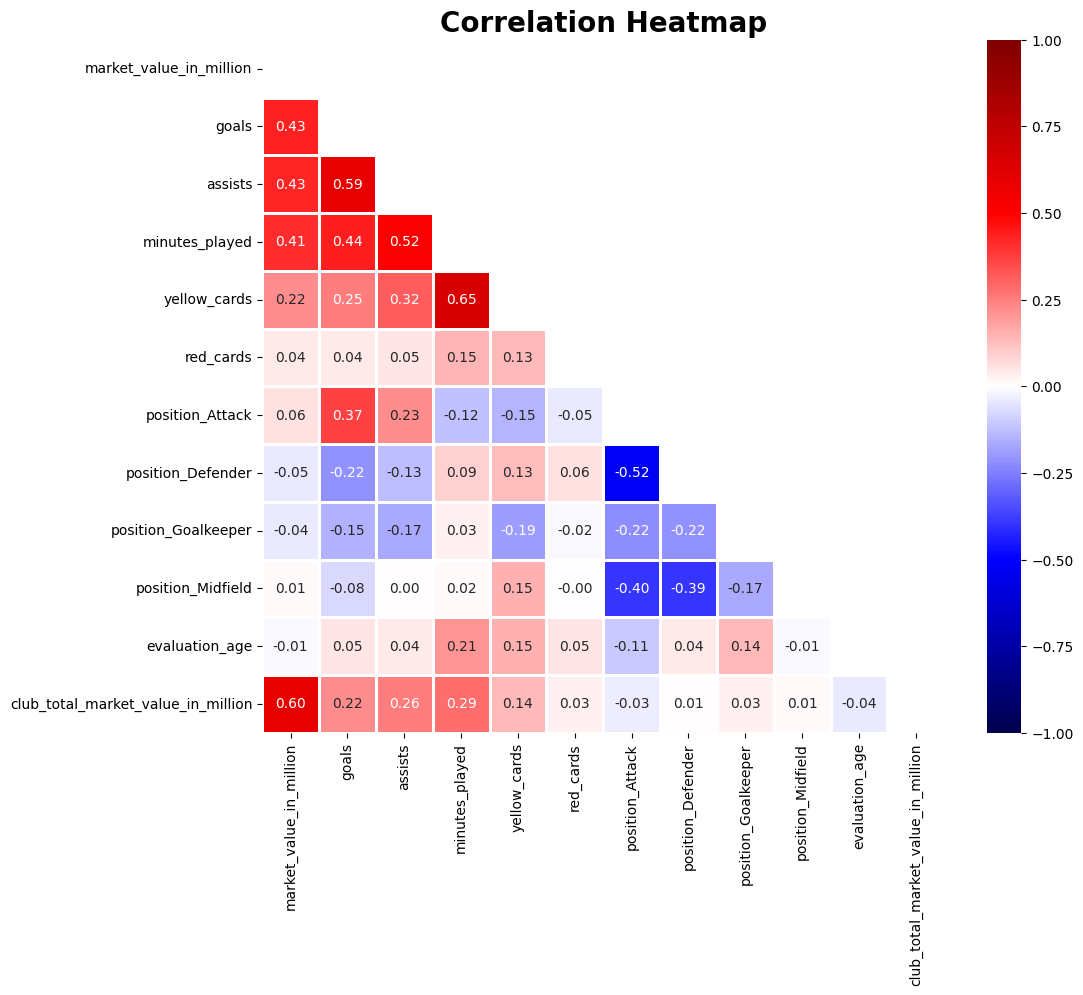

In [5]:
#visualizing the correaltion
fig = plt.figure(figsize=[11,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('correlation.png')

In [6]:
#separating labels & features from the dataset
labels = df['market_value_in_million'].to_numpy()
features = df.drop(['market_value_in_million'], axis=1).to_numpy()

In [7]:
# data standardization on features
#scaler = StandardScaler()
#features = scaler.fit_transform(features)

In [8]:
#creating training & testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
#X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.2,random_state=42)

In [9]:
#modelling
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train,y_train)
predicted = poly.predict(X_test)

In [10]:
#evaluation metrics
rmse = mean_squared_error(predicted, y_test, squared=False)
mae = mean_absolute_error(predicted, y_test)
mse = mean_squared_error(predicted, y_test)

print('mean absolute error: %12.4f' % mae)
print('mean squared error: %14.4f' % mse)
print('root mean squared error: %8.4f' % rmse)
print('R2 score is: {}'.format(r2_score(y_test, predicted)))

mean absolute error:       2.1922
mean squared error:        25.0584
root mean squared error:   5.0058
R2 score is: 0.565614212268906


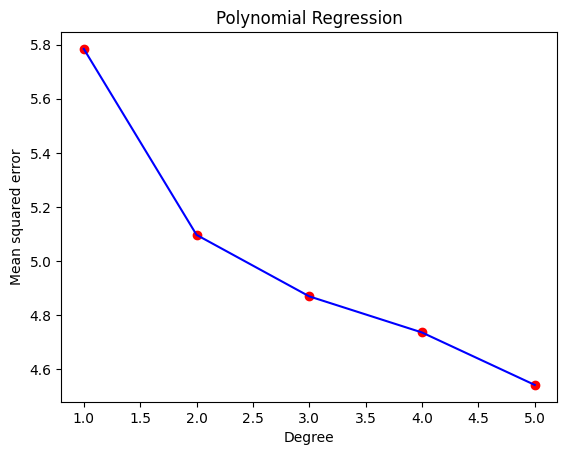

In [11]:
#analysing the accuracy for multiple degrees. The lower the error is, the better is the accuracy of the model.
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:
    poly_model = PolynomialFeatures(degree=degree)
    poly_x_values = poly_model.fit_transform(features)
    poly_model.fit(poly_x_values, labels)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, labels)
    y_pred = regression_model.predict(poly_x_values)
    plt_mean_squared_error.append(mean_squared_error(labels, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="red")
plt.plot(number_degrees,plt_mean_squared_error, color="blue") 
plt.xlabel('Degree')
plt.ylabel('Mean squared error')
plt.title('Polynomial Regression')
plt.show()

From above, we see that model performed best when the degree is 5, meaning a 'quintic' function or the fifth degree polynomial helped us predict the player's market value accurately when compared with the rest.

In [12]:
#additional evaluation metrics
kf = KFold(n_splits=4, shuffle=True, random_state = 42)
Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train, y_train, cv=kf, scoring='r2'))
Std_R2_Poly_CV = np.std(cross_val_score(poly, X_train, y_train, cv=kf, scoring='r2'))
Std_MAE_Poly_CV = np.std(cross_val_score(poly, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error'))
print('r squared standard deviation: %12.4f' % Std_R2_Poly_CV)
print('mean r squared: %14.4f' % Mean_R2_Poly_CV )
print('mean absolute error standard deviation: %8.4f' % Std_MAE_Poly_CV )

r squared standard deviation:       0.0233
mean r squared:         0.5279
mean absolute error standard deviation:   0.0593
